Text Mining - Práctica

AFI - Máster en Data Science y Big Data

Manuela Larrea Gómez

Abril 2024


In [74]:
!pip install nltk deep-translator
!python -m spacy download es_core_news_sm

     ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
     ---------------------------------------- 0.1/12.9 MB 2.3 MB/s eta 0:00:06
     - -------------------------------------- 0.4/12.9 MB 4.6 MB/s eta 0:00:03
     -- ------------------------------------- 0.8/12.9 MB 5.7 MB/s eta 0:00:03
     ---- ----------------------------------- 1.4/12.9 MB 7.3 MB/s eta 0:00:02
     ----- ---------------------------------- 1.9/12.9 MB 7.9 MB/s eta 0:00:02
     ------- -------------------------------- 2.4/12.9 MB 8.5 MB/s eta 0:00:02
     --------- ------------------------------ 2.9/12.9 MB 8.9 MB/s eta 0:00:02
     ---------- ----------------------------- 3.5/12.9 MB 9.3 MB/s eta 0:00:02
     ------------ --------------------------- 4.1/12.9 MB 9.6 MB/s eta 0:00:01
     -------------- ------------------------- 4.6/12.9 MB 9.9 MB/s eta 0:00:01
     ---------------- ----------------------- 5.2/12.9 MB 10.0 MB/s eta 0:00:01
     ----------------- ---------------------- 5.7/12.9 MB 

In [75]:
# Paquetes requeridos

import re
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
from collections import Counter


import spacy
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

from nltk.probability import FreqDist
from nltk.tag import pos_tag

from wordcloud import WordCloud
import pandas as pd


from nltk.tokenize import word_tokenize
from deep_translator import GoogleTranslator

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manu-\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manu-\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### EJERCICIO 1 Fechas

Vamos a crear expresiones regulares que nos permitan detectar dentro de un texto fechas en distintos formatos.

In [2]:
# 1.1 Construye una regex que se active con el siguiente formato dd-mm-yy (e.g. 30-03-20)
regex_1_1 = r'\b\d{2}-\d{2}-\d{2}\b'

Ahora, probemosla:

In [3]:
text = "Esta práctica se entrega el 09-07-24 y es importante."
matches = re.findall(regex_1_1, text)
print(matches)  # Output: ['09-07-24']

['09-07-24']


In [4]:
# 1.2 A veces, como separador en vez de - se utiliza /. Modifica la regex anterior para que también se active con el siguiente formato:
# dd/mm/yy (e.g. 30/03/20)
# Ojo, debe activarse también con el formato de la celda anterior.
regex_1_2 = r'\b\d{2}[-/]\d{2}[-/]\d{2}\b'

Ahora, probémosla:

In [5]:
text = "Afi Alumni es el 13-06-24 y el master acaba el 16/06/24."
matches = re.findall(regex_1_2, text)
print(matches)  # Output: ['13-06-24', '16/06/24']

['13-06-24', '16/06/24']


In [6]:
# 1.3 Has llegado hasta aquí pero tú también sabes que no siempre se añade el 0 a los meses que van de enero a septiembre.
# Modifica tu regex para que tenga en cuenta esto. (e.g. 30/3/20)
# Ojo, debe activarse también con el formato de las celdas anteriores.
regex_1_3 = r'\b\d{2}[-/](?:0?[1-9]|1[0-2])[-/]\d{2}\b'

Ahora, probémosla:

In [7]:
text = "Las fechas importantes de este mes son 13-06-24, 16/6/24 y 29-6-24."
matches = re.findall(regex_1_3, text)
print(matches)  # Output: ['13-06-24', '16/6/24' y '29-6-24']

['13-06-24', '16/6/24', '29-6-24']


### EJERCICIO 2 Emails

La expresión regular construida tiene en cuenta los requisitos definidos por estos documentos:

**_Local-part:_**

Según RFC 5322 (https://datatracker.ietf.org/doc/html/rfc5322), el local-part puede contener letras (a-z, A-Z), dígitos (0-9), y caracteres especiales (! # $ % & ' * + - / = ? ^ _ { | } ~`), pero para simplificación y compatibilidad, a menudo se permite solo un subconjunto más común (letras, números, puntos, guiones, guiones bajos y signos más).


**_Domain:_**

Según RFC 1035 (https://datatracker.ietf.org/doc/html/rfc1035) y RFC 5322, el domain debe seguir el formato de nombres de dominio válidos, que incluye letras, dígitos y guiones. Los nombres de dominio también pueden tener subdominios separados por puntos.

La extensión del dominio debe tener al menos dos caracteres alfabéticos (para incluir dominios comunes como .com, .org, .net).

In [8]:
# Construye una regex que compruebe que una cadena cumple los requisitos para ser una dirección de email.
regex_email = r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'

Ahora, probémosla:

In [9]:
emails = [
    "manuscula.ai@example.com",
    "manu.manu+larrea+gomez@example.com",
    "manuela-larrea@example.co.uk",
    "manu@subdomain.example.com",
    "invalid-email@",
    "another.invalid@.com",
    "yet.another@invalid@domain.com",
]

for email in emails:
    match = re.match(regex_email, email)
    print(f"{email}: {'Valid' if match else 'Invalid'}")

manuscula.ai@example.com: Valid
manu.manu+larrea+gomez@example.com: Valid
manuela-larrea@example.co.uk: Valid
manu@subdomain.example.com: Valid
invalid-email@: Invalid
another.invalid@.com: Invalid
yet.another@invalid@domain.com: Invalid


### EJERCICIO 3 Analizador de textos

Prepara una secuencia de celdas que te sirva para hacer un análisis del texto o los textos que elijas.

Puedes utilizar alguno de los ya incluídos en los paquetes o incluir alguno que encuentres por tu cuenta. En ese caso no te olvides de incluirlo(s) en la entrega de la práctica.

Puedes elegir si lo haces sobre textos en español o en ingles.

Utiliza las funciones vistas en clase e incluye una celda de texto explicando las conclusiones que sacas de los resultados.

Recuerda lo dicho en clase, más vale pocas cosas pero relevantes que aplicar todo lo visto en clase sin motivo.

**_Solución_**

Siempre me he preguntado qué de especial tuvo la arenga de Alejandro Magno durante su campaña a India, ya que (un poco de contexto) sus tropas estaban muy cansadas y desmotivadas y lo cuestionaban por querer continuar la marcha. Es muy increíble pensar que sus tropas le cuestionaron su liderazgo, teniendo en cuenta que para ese punto Alejandro Magno YA ERA uno de los conquistadores más grandes de la historia ... veamos:

Según la teoría de discursos, un discurso motivacional eficaz debe:

1. Reconocer los Logros Pasados: Recordar a la audiencia sus éxitos previos para fomentar un sentido de orgullo y capacidad.

2. Proveer una Visión de Futuro: Ofrecer una imagen clara y positiva del futuro que inspire y motive.

3. Apelar a Emociones: Utilizar una mezcla de emociones para conectar con la audiencia a un nivel personal.

4. Establecer una Relación de Confianza: Mostrar que el orador comparte los mismos riesgos y recompensas que la audiencia.

Fuente:  https://pressbooks.ulib.csuohio.edu/csu-fyw-rhetoric/chapter/rhetorical-strategies-building-compelling-arguments/

Veamos si con NLP podemos ver donde radicó el éxito de Alejandro Magno

Leemos y cargamos los datos

In [34]:
with open('./data/Alex_Magnus.txt', 'r', encoding='utf-8') as f:
    text = f.read()
    
text = text.replace("\n", ' ')
text = text.replace("\ufeff", '')
text = text.replace("—", ' ')

Tokenizamos

In [45]:
tokens = word_tokenize(text.lower())

Eliminamos las stopwords para hacer un analisis de frecuencia de palabras

In [46]:
stop_words = set(stopwords.words('spanish'))
filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

Las más frecuenctes son:

In [47]:
word_counts = Counter(filtered_tokens)
common_words = word_counts.most_common(10)
common_words

[('si', 9),
 ('ser', 5),
 ('aliados', 4),
 ('griegos', 4),
 ('sometido', 4),
 ('allá', 4),
 ('río', 4),
 ('macedonios', 3),
 ('libia', 3),
 ('así', 3)]

Ahora, veamos cuales son los sustantivos más frecuentes:

In [48]:
# Descargamos el modelo de spaCy en español
nlp = spacy.load("es_core_news_sm")

# Procesamos el texto con spaCy
doc = nlp(text.lower())

     ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.9 MB 1.3 MB/s eta 0:00:11
     ---------------------------------------- 0.1/12.9 MB 1.3 MB/s eta 0:00:10
     - -------------------------------------- 0.6/12.9 MB 4.8 MB/s eta 0:00:03
     --- ------------------------------------ 1.1/12.9 MB 6.5 MB/s eta 0:00:02
     ---- ----------------------------------- 1.5/12.9 MB 6.6 MB/s eta 0:00:02
     ------ --------------------------------- 2.2/12.9 MB 8.3 MB/s eta 0:00:02
     -------- ------------------------------- 2.7/12.9 MB 8.6 MB/s eta 0:00:02
     -------- ------------------------------- 2.8/12.9 MB 7.8 MB/s eta 0:00:02
     --------- ------------------------------ 3.2/12.9 MB 8.1 MB/s eta 0:00:02
     ----------- ---------------------------- 3.7/12.9 MB 8.1 MB/s eta 0:00:02
     ------------ --------------------------- 3.9/12.9 MB 7.7 MB/s eta 0:00:02
     ------------ --------------------------- 4.0/12.9 MB 7

Filtramos los sustantivos

In [49]:
nouns = [token.text for token in doc if token.pos_ == "NOUN"]

Veamos los más frecuentes

In [50]:
noun_counts = Counter(nouns)
common_nouns = noun_counts.most_common(20)
common_nouns

[('vosotros', 6),
 ('tierra', 4),
 ('río', 4),
 ('macedonios', 3),
 ('aliados', 3),
 ('parte', 3),
 ('naciones', 3),
 ('hircania', 3),
 ('mar', 3),
 ('tierras', 3)]

Veamoslo en una wordcloud

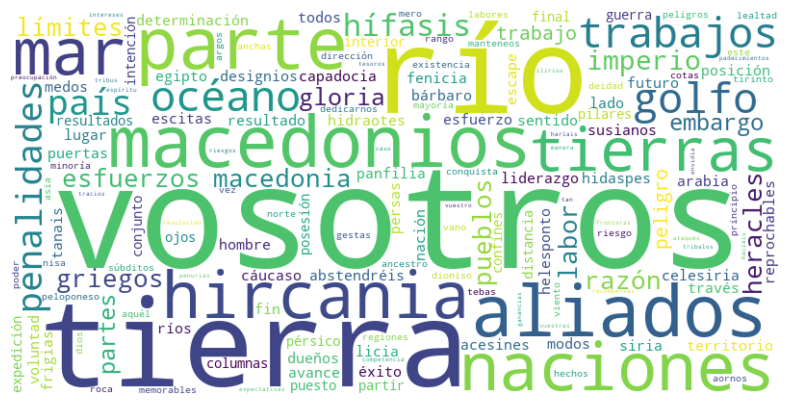

In [71]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(noun_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Estas palabras subrayan la narrativa de conquista y la llamada a la acción. "Si" y "ser" indican una estructura condicional y reflexiva, mientras que "aliados", "griegos" y "macedonios" destacan la composición de diversas etnias y culturas del ejército.

Un poco de contexto histórico: El ejército de Alejandro era un resultado obvio de sus conquistas y expansiones territoriales. Si bien su núcleo estaba compuesto por Macedonios, tenia un montón de soldados de otros sitios:

<!DOCTYPE html>
<html lang="es">
<head>
    <meta charset="UTF-8">
    <title>Composición del Ejército de Alejandro Magno</title>
    <style>
        table {
            width: 100%;
            border-collapse: collapse;
        }
        table, th, td {
            border: 1px solid black;
        }
        th, td {
            padding: 15px;
            text-align: left;
        }
        th {
            background-color: #f2f2f2;
        }
    </style>
</head>
<body>


<table>
    <tr>
        <th>Grupo</th>
        <th>Origen</th>
        <th>Rol</th>
    </tr>
    <tr>
        <td>Griegos</td>
        <td>Ciudades-estado griegas como Atenas, Esparta, y Tebas</td>
        <td>Unidades de infantería y tropas auxiliares</td>
    </tr>
    <tr>
        <td>Tracios e Ilirios</td>
        <td>Regiones del noreste de Grecia y la península balcánica</td>
        <td>Infantería ligera y tropas de choque</td>
    </tr>
    <tr>
        <td>Persas y otros asiáticos</td>
        <td>Territorios conquistados en el Imperio Persa, incluyendo Persia, Media, Bactria, y Sogdiana</td>
        <td>Integrados progresivamente en el ejército de Alejandro como infantería y caballería</td>
    </tr>
    <tr>
        <td>Egipcios y otros pueblos del norte de África</td>
        <td>Egipto y Libia helénica</td>
        <td>Tropas auxiliares y arqueros</td>
    </tr>
</table>

</body>
</html>



Ahora, veamos el ciclo de vida de estos sustantivos en todo el discurso

In [53]:
most_common_nouns = [word for word, count in common_nouns[:5]]
dispersion = {word: [i for i, token in enumerate(tokens) if token == word] for word in most_common_nouns}

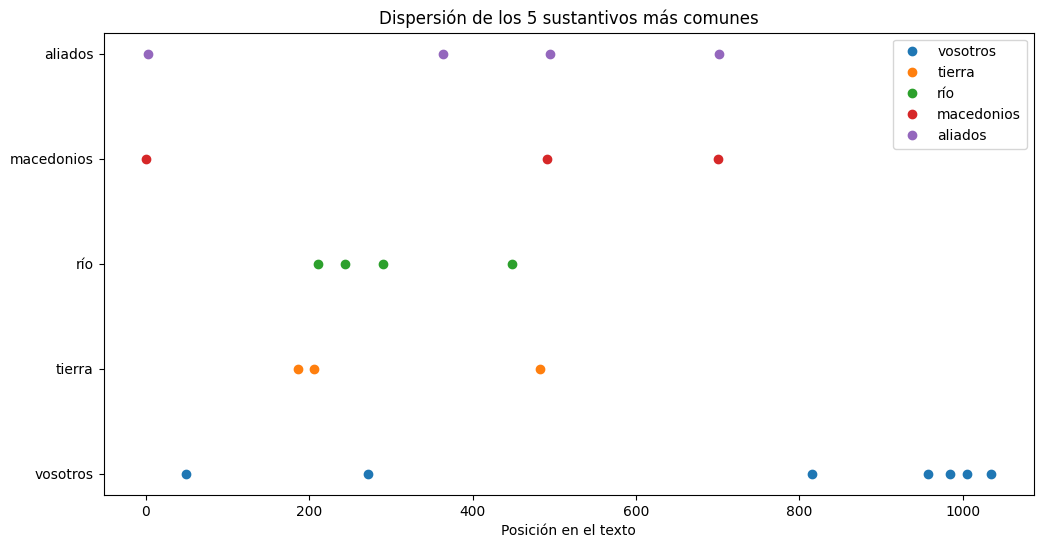

In [54]:
plt.figure(figsize=(12, 6))
for word, indices in dispersion.items():
    plt.plot(indices, [word] * len(indices), 'o', label=word)
plt.yticks(range(len(most_common_nouns)), most_common_nouns)
plt.legend(loc='upper right')
plt.title("Dispersión de los 5 sustantivos más comunes")
plt.xlabel("Posición en el texto")
plt.show()

Ahora veamos el "sentimiento". Para esto definiré una lista de palabras "positivas" y otra de palabras "negativas". 

Me crearé estas listas manualmente con las palabras más frecuentes que calculamos anteriormente, porque no dispongo de un diccionario de palabras positivas y negativas en español. En términos generales, lo que buscaré con estas listas será representar una seleccion de términos que podrían estar presentes en el discruso y que tinenen connotaciones claramente positivas o negativas:

In [61]:
positive_words = ['gloria', 'éxito', 'valiente', 'firme', 'recompensa']
negative_words = ['penalidades', 'temer', 'reprochable']

# Calculamos la frecuencia de estas palabras
word_freq = Counter(filtered_tokens)

Ahora me inventaré un puntaje. Básicamente lo que haré será calcular la cantidad de palabras positivas y negativas en el discurso sumando las freciencias de las palabras que aparecen en las listas que creé anteriormente. Luego crear;e un diccionario sentimen_scores para almacenar esos conteos y calcular un puntaje neto (net) de "sentimiento"

In [ ]:
positive_count = sum(word_freq[word] for word in positive_words if word in word_freq)
negative_count = sum(word_freq[word] for word in negative_words if word in word_freq)

sentiment_scores = {
    'positive': positive_count,
    'negative': negative_count,
    'net': positive_count - negative_count
}

También podría ser interesante ver cuáles son las palabras que más aparecen juntas en el discruso para entender posibles relaciones entre términos. 

Para esto calculare la frecuencia  con la que aparecen juntas las palabras en una ventana de dos palabras. 

In [62]:
co_occurrence = Counter()
window_size = 2

for i in range(len(filtered_tokens) - window_size):
    word_pair = tuple(filtered_tokens[i:i + window_size])
    co_occurrence[word_pair] += 1

In [72]:
sentiment_scores

{'positive': 4, 'negative': 3, 'net': 1}

El resultado sugiere un balance ligeramente positivo, adecuado para un discurso motivacional que busca inspirar a las tropas al enfocarse en la "gloria" y minimizar las "penalidades".

In [73]:
co_occurrence.most_common(20)

[(('a', 'las'), 5),
 (('de', 'los'), 5),
 (('a', 'los'), 5),
 (('más', 'allá'), 4),
 (('y', 'el'), 4),
 (('los', 'que'), 4),
 (('a', 'la'), 3),
 (('en', 'un'), 3),
 (('que', 'los'), 3),
 (('allá', 'de'), 3),
 (('de', 'las'), 3),
 (('el', 'mar'), 3),
 (('y', 'las'), 3),
 (('las', 'de'), 3),
 (('que', 'aún'), 3),
 (('que', 'el'), 3),
 (('macedonios', 'y'), 2),
 (('y', 'aliados'), 2),
 (('se', 'os'), 2),
 (('es', 'que'), 2)]

Estas combinaciones reflejan estructuras retóricas repetitivas que Alejandro utiliza para enfatizar sus puntos clave, como la expansión ("más allá") y la unidad ("de los", "a los").

Ahora veamoslo todo en conjunto para concluir

In [70]:
{
    'common_words': common_words,
    'common_nouns': common_nouns,
    'sentiment_scores': sentiment_scores,
    'co_occurrence': co_occurrence.most_common(10)
}


{'common_words': [('si', 9),
  ('ser', 5),
  ('aliados', 4),
  ('griegos', 4),
  ('sometido', 4),
  ('allá', 4),
  ('río', 4),
  ('macedonios', 3),
  ('libia', 3),
  ('así', 3)],
 'common_nouns': [('vosotros', 6),
  ('tierra', 4),
  ('río', 4),
  ('macedonios', 3),
  ('aliados', 3),
  ('parte', 3),
  ('naciones', 3),
  ('hircania', 3),
  ('mar', 3),
  ('tierras', 3)],
 'sentiment_scores': {'positive': 4, 'negative': 3, 'net': 1},
 'co_occurrence': [(('a', 'las'), 5),
  (('de', 'los'), 5),
  (('a', 'los'), 5),
  (('más', 'allá'), 4),
  (('y', 'el'), 4),
  (('los', 'que'), 4),
  (('a', 'la'), 3),
  (('en', 'un'), 3),
  (('que', 'los'), 3),
  (('allá', 'de'), 3)]}

**Estructura Inclusiva:** El uso frecuente de "vosotros" y referencias directas a los soldados crea un tono inclusivo y personal, esencial para conectar emocionalmente con la tropa. Alejandro apela a su sentido de pertenencia y responsabilidad compartida.

**Enfoque en la Conquista y la Expansión:** La repetición de términos relacionados con la geografía ("tierra", "río") y la expansión ("más allá") subraya la narrativa de la conquista continua, inspirando a los soldados con la promesa de nuevas tierras y gloria.

**Unidad Multinacional:** La mención de diferentes grupos étnicos ("macedonios", "aliados", "griegos") destaca la necesidad de mantener la unidad entre las diversas fuerzas, sin duda esto desmotivó la rebelión que Alejandro sentía en las narices. Fue crucial para el éxito de sus campañas.

**Balance Emocional:** El análisis de sentimientos muestra un balance ligeramente positivo, adecuado para un discurso motivacional que busca elevar la moral de las tropas. Alejandro enfatiza los logros y minimiza las dificultades, manteniendo un tono de esperanza y ambición.


Pero bueno... un leve disclaimer: Este discurso le funcionó a Alejandro en el corto plazo, porque las tropas continuaron la marcha un poco más, pero finalmente, la resistencia y la fatiga prevalecieron. Las tropas se revelaron en el río Hífasis y lo forzaron a regresar a Babilonia...

Aquí sin duda la conclusión más directa es que las promesas de gloria de Alejandro solo sirvieron para el impulso inicial y momentáneo  ("vosotros", "gloria", "tierra"), pero no lograron sostener la moral en condiciones extremas... Un poco de descanso quizá no lo habría forzado a regresar a Babilonia. 

### EJERCICIO 4 Traductor años 90

1. Utiliza las funcionalidades vistas en clase para crear un traductor palabra a palabra.

    El resultado debe ser la traducción al inglés de la siguiente historia

    "indio querer hablar vaquero"

    "vaquero disparar"

    "vaquero hombre malo"

2. Ahora me gustaría saber como quedaría esta historia en japonés.

    En las traspas tienes información importante sobre cómo hacerlo.

    Pista: quizás debas dar un rodeo.

In [76]:
def translate_word_by_word(text, source_lang='es', target_lang='en'):
    # Tokenizar el texto en palabras
    words = word_tokenize(text, language='spanish')
    
    # Traducir cada palabra individualmente
    translated_words = [GoogleTranslator(source=source_lang, target=target_lang).translate(word) for word in words]
    
    # Volver a unir las palabras traducidas en una sola cadena
    translated_text = ' '.join(translated_words)
    return translated_text

Ahora, probémoslo

In [77]:
phrases = [
    "indio querer hablar vaquero",
    "vaquero disparar",
    "vaquero hombre malo"
]

translated_phrases = [translate_word_by_word(phrase) for phrase in phrases]

In [78]:
for original, translated in zip(phrases, translated_phrases):
    print(f"Original: {original}")
    print(f"Traducido: {translated}")
    print()

Original: indio querer hablar vaquero
Traducido: Indian want talk cowboy

Original: vaquero disparar
Traducido: cowboy shoot

Original: vaquero hombre malo
Traducido: cowboy man bad



Ahora, en japonés...

Con este punto solo pienso en: Desarrollo incremental y escalabilidad. Así que aplicaré POO (programacion orientada a objetos). 

Nota: No eliminare el desarrollo anterior, para explicitar la necesidad de implementar la logica POO cuando se quiere hacer un producto extensible que soporte la traducción a diferentes idiomas

In [79]:
class WordByWordTranslator:
    def __init__(self, source_lang='es', target_lang='en'):
        self.source_lang = source_lang
        self.target_lang = target_lang

    def set_target_language(self, target_lang):
        self.target_lang = target_lang

    def translate(self, text):
        words = word_tokenize(text, language='spanish')
        translated_words = [GoogleTranslator(source=self.source_lang, target=self.target_lang).translate(word) for word in words]
        translated_text = ' '.join(translated_words)
        return translated_text

In [80]:
translator = WordByWordTranslator()

Ahora, probémoslo:

In [81]:
# Traduzco las frases a inglés
print("Traducción al inglés:")
for phrase in phrases:
    print(f"Original: {phrase}")
    print(f"Traducido: {translator.translate(phrase)}")
    print()

# Cambio el idioma de destino a japonés y traduzco nuevamente
translator.set_target_language('ja')
print("Traducción al japonés:")
for phrase in phrases:
    print(f"Original: {phrase}")
    print(f"Traducido: {translator.translate(phrase)}")
    print()

Traducción al inglés:
Original: indio querer hablar vaquero
Traducido: Indian want talk cowboy

Original: vaquero disparar
Traducido: cowboy shoot

Original: vaquero hombre malo
Traducido: cowboy man bad

Traducción al japonés:
Original: indio querer hablar vaquero
Traducido: インド人 欲しい 話す カウボーイ

Original: vaquero disparar
Traducido: カウボーイ シュート

Original: vaquero hombre malo
Traducido: カウボーイ 男 悪い



### EJERCICIO 5 Clasificador textos

Modifica el código visto en clase (6 Clasificación Textos) para solucionar los dos problemas que encontramos. De cara a la entrega, crea una copia del fichero, modificalo y envíalo en la práctica. Comprueba que el fichero entero funciona correctamente antes de enviarlo.

1. Adapta las funciones correspondientes para que a la hora de vectorizar si encontramos una palabra que no está en el vocabulario no se lance un error.

2. Adapta las funciones o añade alguna nueva para que los textos a los que queremos asignar un sentimiento se preprocesen de forma correcta.

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score
import nltk

# Descargar los recursos de NLTK necesarios
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manu-\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manu-\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\manu-\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
def preprocess_text(text):
    # Tokenización
    tokens = word_tokenize(text)
    # Lematización
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.isalpha()]
    # Eliminar stopwords
    tokens = [token for token in tokens if token not in stopwords.words('spanish')]
    return ' '.join(tokens)

In [ ]:
## Críticas de películas
g = open('./data/reviews.txt','r') 
reviews = g.read().splitlines()
g.close()

## Sentimiento asociado
g = open('./data//labels.txt','r') # What we WANT to know!
labels = g.read().upper().splitlines()
g.close()

# Preprocesar los textos
preprocessed_texts = [preprocess_text(text) for text in texts]

In [ ]:
class CustomCountVectorizer(CountVectorizer):
    def transform(self, raw_documents):
        # Asegurarnos de que vocabulary_ esté construido
        self._check_vocabulary()
        # Obtener el analyzer original
        analyzer = super(CustomCountVectorizer, self).build_analyzer()
        # Transformar los documentos
        return super(CustomCountVectorizer, self).transform(
            [' '.join([w for w in analyzer(doc) if w in self.vocabulary_]) for doc in raw_documents]
        )

vectorizer = CustomCountVectorizer()
X = vectorizer.fit_transform(preprocessed_texts)



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.33, random_state=42)


ValueError: Found input variables with inconsistent numbers of samples: [3, 25000]

In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [ ]:
y_pred = model.predict(X_test)

# Evaluar el modelo
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

Accuracy: 0.0


c:\Users\manu-\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\manu-\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\manu-\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [ ]:
def sentiment_analysis(text):
    preprocessed = preprocess_text(text)
    vectorized = vectorizer.transform([preprocessed])
    prediction = model.predict(vectorized)
    return 'Positivo' if prediction[0] == 1 else 'Negativo'

# Ejemplo de uso
print(sentiment_analysis("La nueva película fue asombrosa"))


Negativo


In [ ]:
## Críticas de películas
g = open('./data/reviews.txt','r') 
reviews = g.read().splitlines()
g.close()

## Sentimiento asociado
g = open('./data//labels.txt','r') # What we WANT to know!
labels = g.read().upper().splitlines()
g.close()